In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

# Julia and Python

You will need to install Julia from http://julialang.org/downloads/ and make sure it is on your path. On Ubuntu you can install via `apt-get` with
```
sudo add-apt-repository ppa:staticfloat/juliareleases
sudo add-apt-repository ppa:staticfloat/julia-deps
sudo apt-get update
sudo apt-get install julia
```

Within an instance of Julia, run the following commands:
```
Pkg.update()
Pkg.add("PyCall")
Pkg.add("IJulia")
```

Then finally install `pyjulia` from https://github.com/JuliaLang/pyjulia

Make sure that you can start `julia` line - if not, add a symlink to it.

In [2]:
%install_ext https://raw.githubusercontent.com/JuliaLang/pyjulia/master/julia/magic.py

Installed magic.py. To use it, type:
  %load_ext magic


In [3]:
%load_ext magic
%julia @pyimport matplotlib.pyplot as plt
%julia @pyimport numpy as np
%julia @pyimport numpy.random as npr

Initializing Julia interpreter. This may take some time...


## Defining a function in Julia

In [4]:
%%julia

function fib(n)
    a, b = 0.0,  1.0
    for i = 1:n
        a, b = a+b, a
    end
    return a
end

<PyCall.jlwrap fib>

## Using it in Python

In [5]:
jfib = %julia fib

jfib(100)

354224848179261997056.0000

## Using Python libraries in Julia

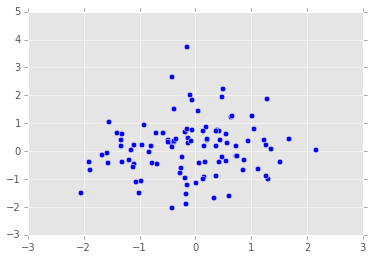

In [6]:
%%julia

xs = npr.multivariate_normal([0,0], np.eye(2), 100)
plt.scatter(xs[:,1], xs[:, 2], s=30);

### Benchmarking

In [7]:
%timeit jfib(100)

10000 loops, best of 3: 22.9 µs per loop
